<Axes: xlabel='balance', ylabel='income'>

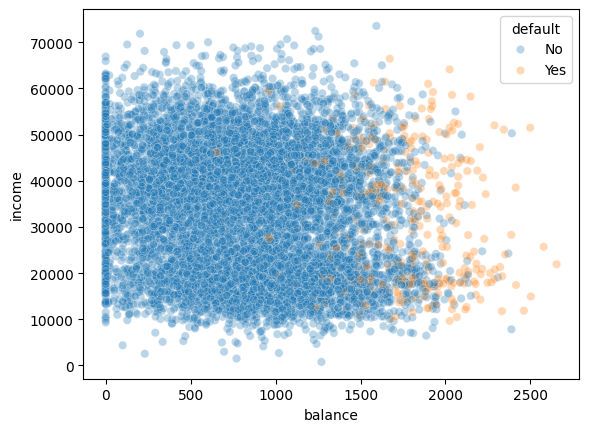

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Default.csv")
df.head()

sns.scatterplot(data=df, x="balance", y="income", hue='default', alpha=0.3)

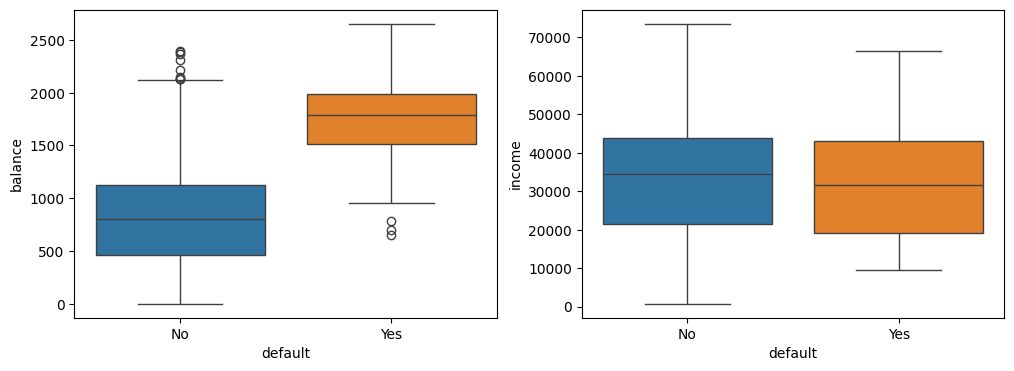

In [51]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

for ax, column in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x='default', hue='default', y=column, ax=ax)

In [52]:
pd.get_dummies(df, columns=["default", "student"], dtype=int).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,1,0,1,0
1,817.180407,12106.134700,1,0,0,1
2,1073.549164,31767.138947,1,0,1,0
3,529.250605,35704.493935,1,0,1,0
4,785.655883,38463.495879,1,0,1,0


In [53]:
df = pd.get_dummies(df, columns=["default", "student"], dtype=int, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [54]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, Y = df.drop("default_Yes", axis="columns"), df["default_Yes"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=69)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegressionCV(penalty='l2')

model.fit(scaled_X_train, Y_train)
model.intercept_, model.coef_

(array([-6.07619725]), array([[ 2.70107357,  0.07542066, -0.13446358]]))

In [55]:
Y_hat = model.predict(scaled_X_test)
print(Y_hat)

[0 0 0 ... 0 0 0]


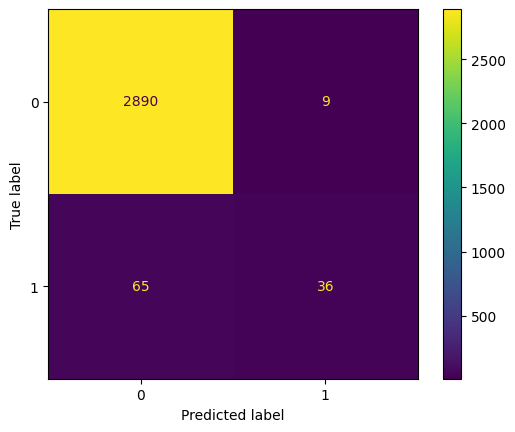

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_hat)
display = ConfusionMatrixDisplay(cm)

display.plot()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2899
           1       0.80      0.36      0.49       101

    accuracy                           0.98      3000
   macro avg       0.89      0.68      0.74      3000
weighted avg       0.97      0.98      0.97      3000

